In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

In [27]:
df = pd.read_csv('./PJME_hourly.csv')

In [23]:
df.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [16]:
df.tail()

,PJME_MW
Datetime,
2018-01-01 20:00:00,44284.0
2018-01-01 21:00:00,43751.0
2018-01-01 22:00:00,42402.0
2018-01-01 23:00:00,40164.0
2018-01-02 00:00:00,38608.0


In [8]:
df = df.set_index('Datetime')
df.index = pd.to_datetime(df.index)

In [10]:
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

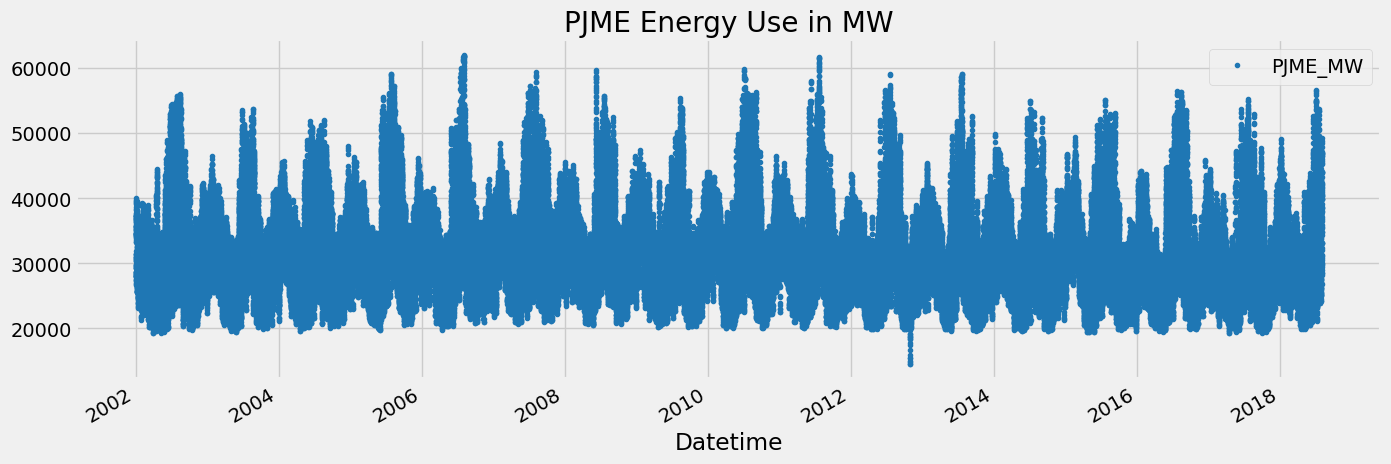

In [11]:
plt.show()

In [36]:
import pandas as pd
import numpy as np

def create_lstm_dataset(df, sequence_length=5):
    # data = []
    df_lstm = pd.DataFrame(columns=['t date', 't-5', 't-4', 't-3', 't-2', 't-1', 't'])
    
    # target_column = df.columns[0]  # Assuming the target column is the first column
    for index in df.index:
        if(index <= 4):
            continue
        new_row = {'t date': df["Datetime"][index], 't-5': df["PJME_MW"][index-5] , 't-4': df["PJME_MW"][index-4], 't-3': df["PJME_MW"][index-3], 't-2': df["PJME_MW"][index-2], 't-1': df["PJME_MW"][index-1], 't': df["PJME_MW"][index]}
        df_row = pd.DataFrame(new_row, index=[0])
        df_lstm = pd.concat([df_lstm, df_row], ignore_index=True)
    
    return df_lstm


# # Example usage:
# # Assuming 'your_dataframe' is your hourly power consumption dataframe
result_df = create_lstm_dataset(df, sequence_length=5)

In [37]:
import tensorflow as tf

In [ ]:
result_df = result_df.set_index('Datetime')

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=False)))
model.add(tf.keras.layers.Dense(1))
model.summary()

In [ ]:
model.compile(loss='mse',
              optimizer="adam",
              metrics=['mean_absolute_error']
              )